In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras

2023-06-27 06:42:18.766049: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-27 06:42:18.768172: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 06:42:18.808134: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-27 06:42:18.809197: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 06:42:19.459006: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
df = pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Since smoking_history has significant amount of data from categories No_info and it's not preferable to impute that much of values

In [6]:
df.drop('smoking_history',axis=1,inplace=True)

In [7]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,25.19,6.6,140,0
1,Female,54.0,0,0,27.32,6.6,80,0
2,Male,28.0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,23.45,5.0,155,0
4,Male,76.0,1,1,20.14,4.8,155,0


In [8]:
#separating categorical and numerical variables
categorical_=['gender','hypertension','heart_disease']
numerical_=['age','bmi','HbA1c_level','blood_glucose_level']  #not including the target variable 

In [10]:
#train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)

In [11]:
#encoding categorical variables
encoder_=OneHotEncoder(handle_unknown='ignore')
categorical_train=pd.DataFrame(encoder_.fit_transform(df_train[categorical_]).toarray())

In [12]:
#scaling numerical variables
scaler_=StandardScaler()
numerical_train=pd.DataFrame(scaler_.fit_transform(df_train[numerical_]),columns=df_train[numerical_].columns)

In [13]:
#combing numerical and categorical
df_train_=pd.concat((numerical_train,categorical_train),axis=1)

In [14]:
#preprocessing test set
categorical_test=pd.DataFrame(encoder_.transform(df_test[categorical_]).toarray())
numerical_test=pd.DataFrame(scaler_.transform(df_test[numerical_]),columns=df_test[numerical_].columns)

In [15]:
#combing categorical and numerical
df_test_=pd.concat((numerical_test,categorical_test),axis=1)

# Model training

# ANN

Since we will need a validation set for the training and test for measuring the performance therefore we will split 
the train set previously created in to train and validation.

In [16]:
X_train,X_val,y_train,y_val=train_test_split(df_train_,df_train['diabetes'])

In [17]:
#creating ANN model
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(40,activation='relu'),
     keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20,
 validation_data=(X_val, y_val))

Epoch 1/20
1641/1641 [==============================] - 6s 3ms/step - loss: 0.1289 - accuracy: 0.9574 - val_loss: 0.1066 - val_accuracy: 0.9628
Epoch 2/20
1641/1641 [==============================] - 6s 3ms/step - loss: 0.1011 - accuracy: 0.9659 - val_loss: 0.0941 - val_accuracy: 0.9687
Epoch 3/20
1641/1641 [==============================] - 5s 3ms/step - loss: 0.0898 - accuracy: 0.9695 - val_loss: 0.0896 - val_accuracy: 0.9678
Epoch 4/20
1641/1641 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9714 - val_loss: 0.0858 - val_accuracy: 0.9698
Epoch 5/20
1641/1641 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.9719 - val_loss: 0.0862 - val_accuracy: 0.9701
Epoch 6/20
1641/1641 [==============================] - 5s 3ms/step - loss: 0.0837 - accuracy: 0.9720 - val_loss: 0.0852 - val_accuracy: 0.9704
Epoch 7/20
1641/1641 [==============================] - 6s 3ms/step - loss: 0.0833 - accuracy: 0.9724 - val_loss: 0.0846 - val_accuracy:

In [33]:
y_scor = model.evaluate(df_train_,df_train['diabetes'])

2188/2188 [==============================] - 4s 2ms/step - loss: 0.0813 - accuracy: 0.9724


In [34]:
y_scor

[0.08129643648862839, 0.9723571538925171]

In [18]:
model.evaluate(df_test_,df_test['diabetes'])

938/938 [==============================] - 1s 901us/step - loss: 0.0822 - accuracy: 0.9718


[0.08216390013694763, 0.9717666506767273]

# Based on our previously trained models still RF performs better with an accuracy of 0.98.

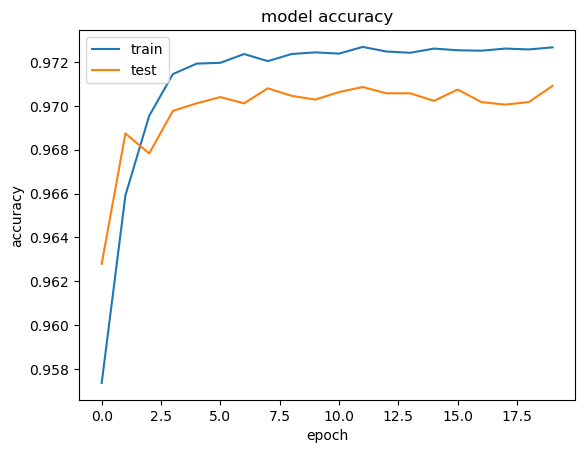

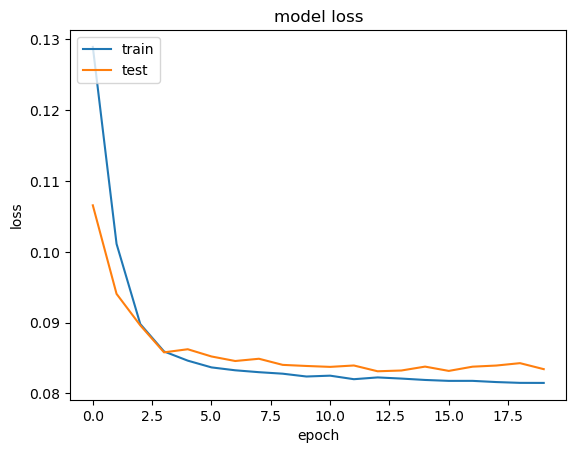

In [37]:
plt.plot(history.history['accuracy']) #variable contains the training accuracy for each epoch.
plt.plot(history.history['val_accuracy']) # variable contains the validation accuracy for each epoch.
plt.title('model accuracy') #
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss']) #variable contains the training loss for each epoch.
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()